In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# train 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/AIVLE/AI SPARK 공모전/train_data.csv')

# test 데이터 불러오기
test = pd.read_csv('/content/drive/MyDrive/AIVLE/AI SPARK 공모전/test_data.csv')

# MinMaxScaler를 이용해 데이터 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# PCA 선언
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=2023)

# TSNE 선언
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=2023)

#### 전체 데이터 pca 시각화 (train, test data)

In [ ]:
# train data : scaling x, pca
train_pca = pca.fit_transform(train.drop(['out_pressure','type'], axis=1))
train_pca = pd.DataFrame(train_pca)
train_pca = pd.concat([train_pca, train['type']], axis=1)

sns.scatterplot(x=train_pca[0], y=train_pca[1], data=train_pca, hue='type', palette='Spectral', legend='full', alpha=0.5)
plt.show()

In [ ]:
# train data : scaling o, pca
train_scaled_pca = pca.fit_transform(scaler.fit_transform(train.drop(['out_pressure','type'], axis=1)))
train_scaled_pca = pd.DataFrame(train_scaled_pca)
train_scaled_pca = pd.concat([train_scaled_pca, train['type']], axis=1)

sns.scatterplot(x=train_scaled_pca[0], y=train_scaled_pca[1], data=train_scaled_pca, hue='type', palette='Spectral', alpha=0.5, legend='full')
plt.show()

In [ ]:
# test data : scaling x, pca
test_pca = pca.fit_transform(test.drop(['out_pressure','type'], axis=1))
test_pca = pd.DataFrame(test_pca)
test_pca = pd.concat([test_pca, test['type']], axis=1)

sns.scatterplot(x=test_pca[0], y=test_pca[1], data=test_pca, hue='type', palette='Spectral', alpha=0.5, legend='full')
plt.plot()

In [ ]:
# test data : scaling o, pca
test_scaled_pca = pca.fit_transform(scaler.fit_transform(test.drop(['out_pressure','type'], axis=1)))
test_scaled_pca = pd.DataFrame(test_scaled_pca)
test_scaled_pca = pd.concat([test_scaled_pca, test['type']], axis=1)

sns.scatterplot(x=test_scaled_pca[0], y=test_scaled_pca[1], data=test_scaled_pca, hue='type', palette='Spectral', alpha=0.5, legend='full')
plt.show()

#### test, train 합쳐서 pca 시각화
1. type 0, 1, 2, 3, 4, 5, 6, 7 모두 나눠서 시각화
2. 왼쪽은 scaling 미적용, 오른쪽은 scaling 적용
3. train 데이터에 linear regression 적용하여 일차방정식 생성
4. test 데이터와 비교하여 diff 차이가 많이 나면 이상치 판단

In [3]:
# 타입 별로 train data + test data
all0 = pd.concat([train[train['type']==0], test[test['type']==0]], axis=0).reset_index(drop=True).drop(['type'], axis=1)
all1 = pd.concat([train[train['type']==1], test[test['type']==1]], axis=0).reset_index(drop=True).drop(['type'], axis=1)
all2 = pd.concat([train[train['type']==2], test[test['type']==2]], axis=0).reset_index(drop=True).drop(['type'], axis=1)
all3 = pd.concat([train[train['type']==3], test[test['type']==3]], axis=0).reset_index(drop=True).drop(['type'], axis=1)
all4 = pd.concat([train[train['type']==4], test[test['type']==4]], axis=0).reset_index(drop=True).drop(['type'], axis=1)
all5 = pd.concat([train[train['type']==5], test[test['type']==5]], axis=0).reset_index(drop=True).drop(['type'], axis=1)
all6 = pd.concat([train[train['type']==6], test[test['type']==6]], axis=0).reset_index(drop=True).drop(['type'], axis=1)
all7 = pd.concat([train[train['type']==7], test[test['type']==7]], axis=0).reset_index(drop=True).drop(['type'], axis=1)

##### type 0

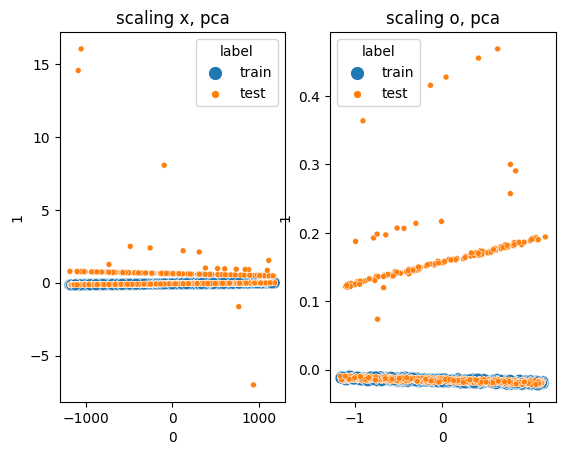

In [4]:
# all0 : pca(scaling x / scaling o)
all0_pca = pca.fit_transform(all0)
all0_pca = pd.DataFrame(all0_pca)
all0_pca['label'] = ['train'] * len(train[train['type']==0]) + ['test'] * len(test[test['type']==0])

plt.subplot(1,2,1)
sns.scatterplot(x=all0_pca[0], y=all0_pca[1], data=all0_pca, hue='label', size='label')
plt.title('scaling x, pca')

all0_scaled_pca = pca.fit_transform(scaler.fit_transform(all0))
all0_scaled_pca = pd.DataFrame(all0_scaled_pca)
all0_scaled_pca['label'] = ['train'] * len(train[train['type']==0]) + ['test'] * len(test[test['type']==0])

plt.subplot(1,2,2)
sns.scatterplot(x=all0_scaled_pca[0], y=all0_scaled_pca[1], data=all0_scaled_pca, hue='label', size='label')
plt.title('scaling o, pca')
plt.show()

In [5]:
# 선형회귀 방정식 구하기 : 방정식에 대입했을 때 차이가 많이 나면 이상치
# scaling x
from sklearn.linear_model import LinearRegression

train0_pca = all0_pca[all0_pca['label']=='train']
test0_pca = all0_pca[all0_pca['label']=='test']

reg0 = LinearRegression()
reg0.fit(train0_pca[0].values.reshape(-1,1), train0_pca[1])

test0_pca['diff'] = abs(reg0.coef_ * test0_pca[0] + reg0.intercept_ - test0_pca[1])

<ipython-input-5-7dc6f2826df7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test0_pca['diff'] = abs(reg0.coef_ * test0_pca[0] + reg0.intercept_ - test0_pca[1])


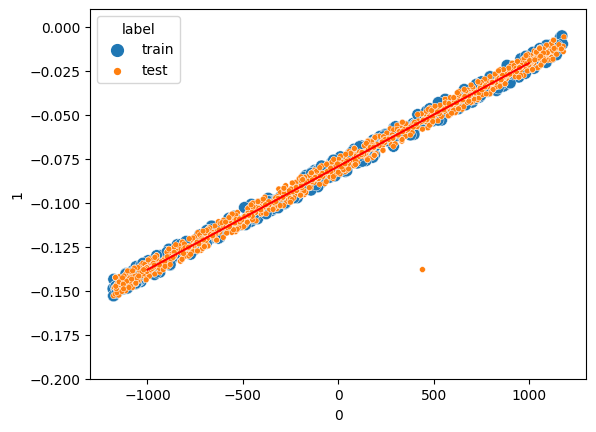

In [17]:
X = np.array(range(-1000,1000))
sns.scatterplot(x=all0_pca[0], y=all0_pca[1], data=all0_pca, hue='label', size='label')
plt.plot(X, reg0.coef_ * X + reg0.intercept_, color='red')
plt.ylim([-0.2,0.01])
plt.show()

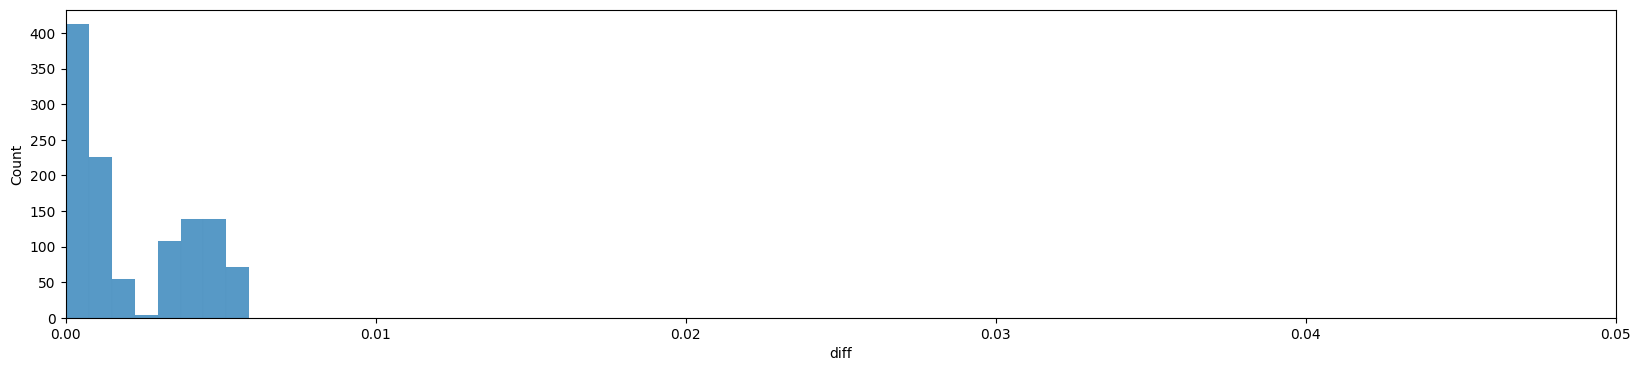

In [19]:
# diff 분포 확인
plt.figure(figsize=(20,4))
sns.histplot(x='diff', data=test0_pca)
plt.xlim([0,0.05])
plt.show() # 0.01 이상이면 이상치

In [20]:
# 이상치 판단
test0_pca['label'] = np.where(test0_pca['diff'] > 0.01, 1, 0)
test0_pca['label'].value_counts()

<ipython-input-20-7f5657d40781>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test0_pca['label'] = np.where(test0_pca['diff'] > 0.01, 1, 0)


0    1153
1     143
Name: label, dtype: int64

In [59]:
test0_tsne = tsne.fit_transform(scaler.fit_transform(test[test['type']==0].drop('type', axis=1)))
test0_tsne = pd.DataFrame(test0_tsne)
test0_tsne.index = test0_pca.index
test0_tsne = pd.concat([test0_tsne, test0_pca['label']], axis=1)
test0_tsne['size'] = np.where(test0_tsne['label']==1, 10, 4)

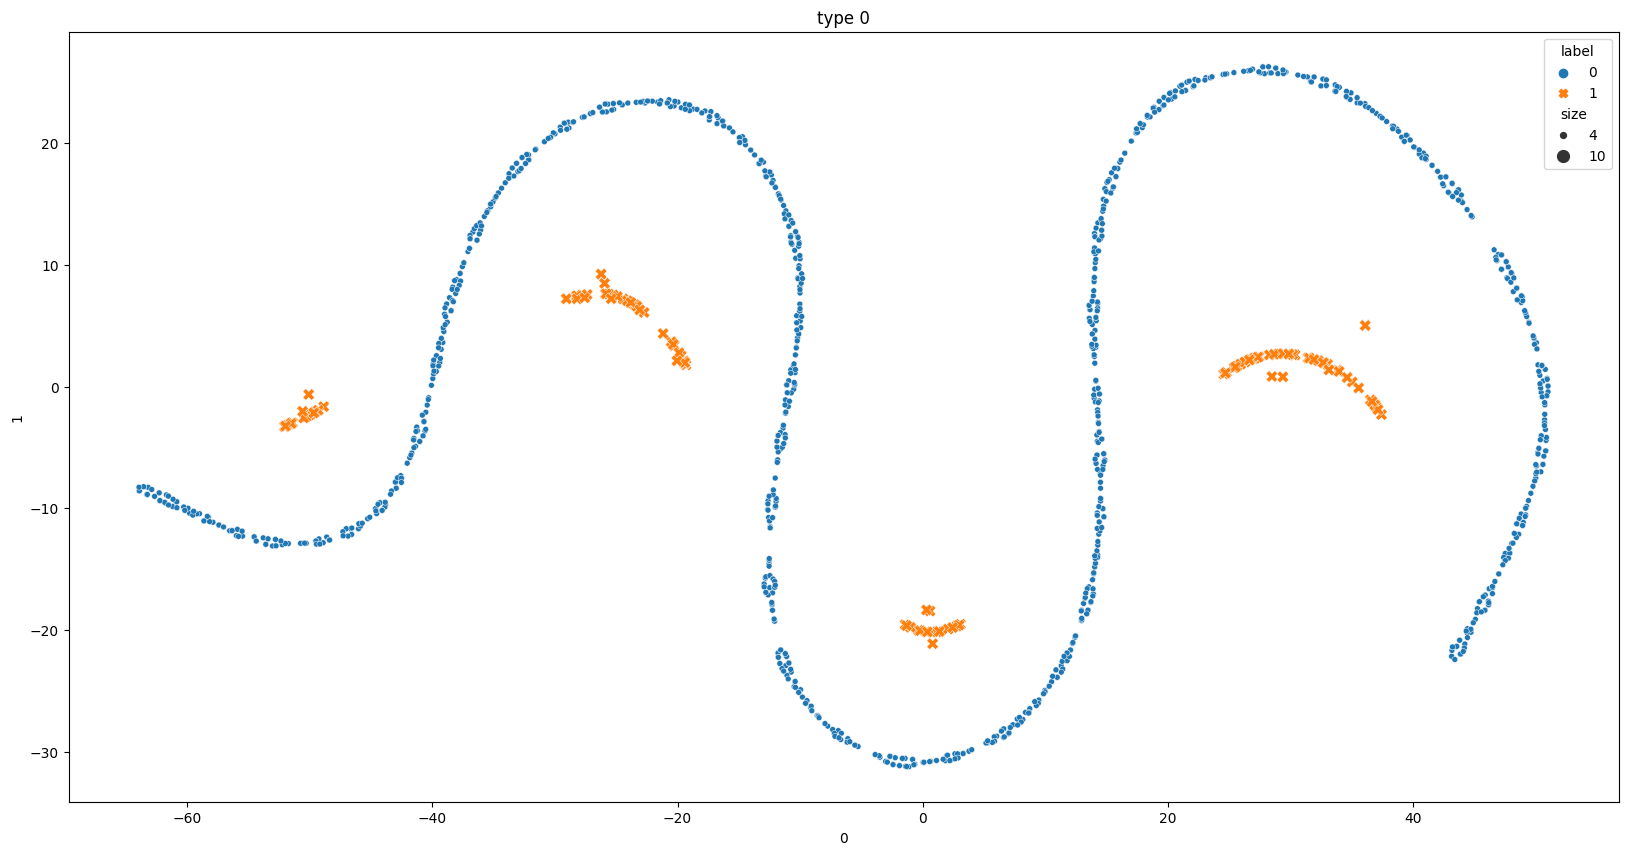

In [60]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=test0_tsne[0], y=test0_tsne[1], data=test0_tsne, hue='label', style='label', size='size')
plt.title('type 0')
plt.show()

##### type 1

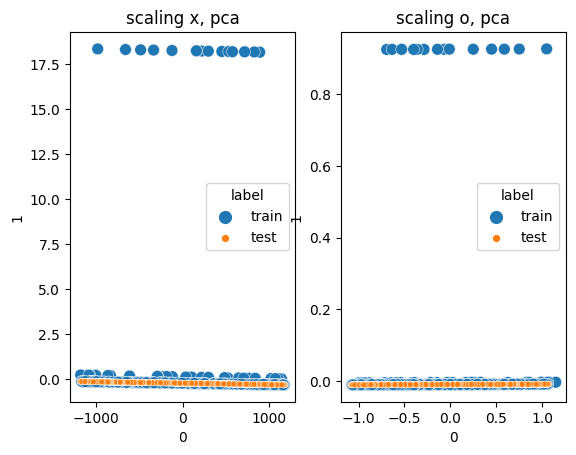

In [26]:
# all1 : pca(scaling x / scaling o)
all1_pca = pca.fit_transform(all1)
all1_pca = pd.DataFrame(all1_pca)
all1_pca['label'] = ['train'] * len(train[train['type']==1]) + ['test'] * len(test[test['type']==1])

plt.subplot(1,2,1)
sns.scatterplot(x=all1_pca[0], y=all1_pca[1], data=all1_pca, hue='label', size='label')
plt.title('scaling x, pca')

all1_scaled_pca = pca.fit_transform(scaler.fit_transform(all1))
all1_scaled_pca = pd.DataFrame(all1_scaled_pca)
all1_scaled_pca['label'] = ['train'] * len(train[train['type']==1]) + ['test'] * len(test[test['type']==1])

plt.subplot(1,2,2)
sns.scatterplot(x=all1_scaled_pca[0], y=all1_scaled_pca[1], data=all1_scaled_pca, hue='label', size='label')
plt.title('scaling o, pca')
plt.show()

In [27]:
# 선형회귀 방정식 구하기 : 방정식에 대입했을 때 차이가 많이 나면 이상치
# scaling o
from sklearn.linear_model import LinearRegression

train1_pca = all1_pca[all1_pca['label']=='train']
test1_pca = all1_pca[all1_pca['label']=='test']

# type1은 test data에 대한 회귀식 생성
reg1 = LinearRegression()
reg1.fit(test1_pca[0].values.reshape(-1,1), test1_pca[1])

train1_pca['diff'] = abs(reg1.coef_ * train1_pca[0] + reg1.intercept_ - train1_pca[1])

<ipython-input-27-d77ec2b239dd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1_pca['diff'] = abs(reg1.coef_ * train1_pca[0] + reg1.intercept_ - train1_pca[1])


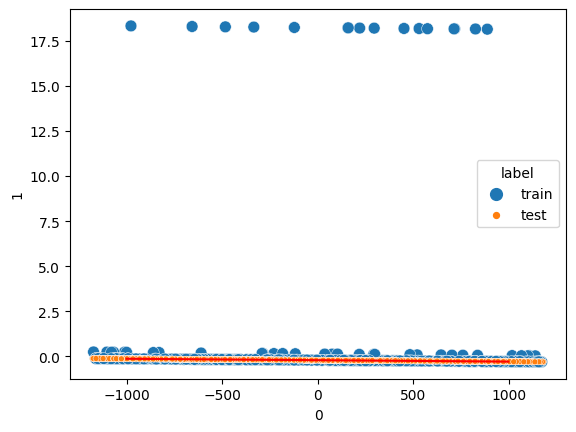

In [30]:
X = np.array(range(-1000,1000))
sns.scatterplot(x=all1_pca[0], y=all1_pca[1], data=all1_pca, hue='label', size='label')
plt.plot(X, reg1.coef_ * X + reg1.intercept_, color='red')
#plt.ylim([-0.012,-0.0107])
#plt.xlim([-1.2,-0.8])
plt.show()

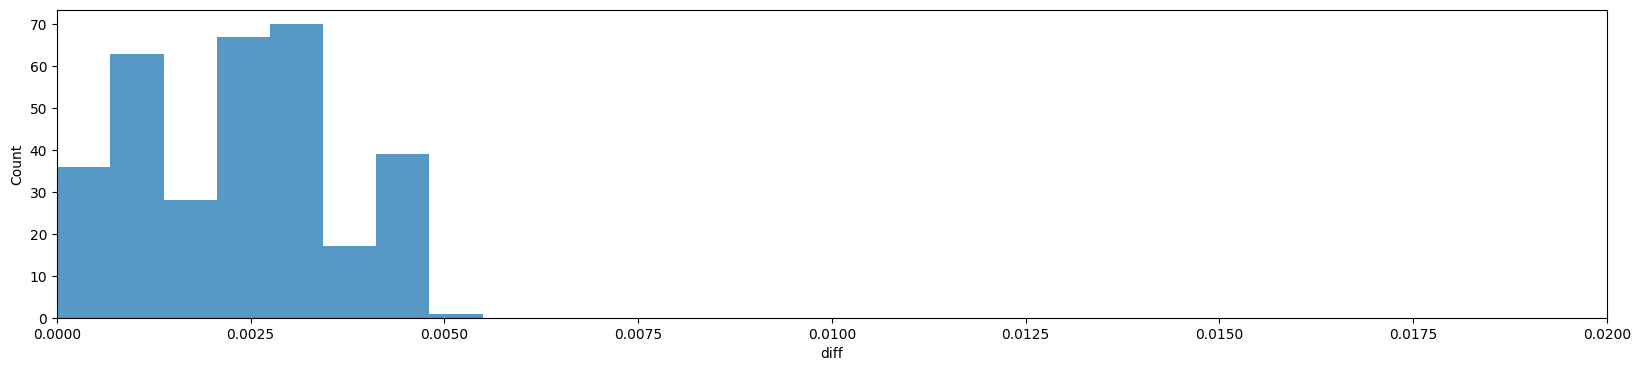

In [33]:
# diff 분포 확인
plt.figure(figsize=(20,4))
sns.histplot(x='diff', data=train1_pca)
plt.xlim([0,0.02])
plt.show() # 0.0003 이상이면 이상치

In [35]:
# 이상치 판단
train1_pca['label'] = np.where(train1_pca['diff'] > 0.01, 1, 0)
train1_pca['label'].value_counts()

<ipython-input-35-7ab046ddc44b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1_pca['label'] = np.where(train1_pca['diff'] > 0.01, 1, 0)


0    321
1     48
Name: label, dtype: int64

In [ ]:
# type 1은 일단 다 정상 판단

train1_pca = pd.DataFrame(pca.fit_transform(train[train['type']==1].drop(['out_pressure','type'], axis=1)))
test1_pca = pd.DataFrame(pca.fit_transform(test[test['type']==1].drop(['out_pressure','type'], axis=1)))

test1_pca['label'] = 0
test1_pca['label'].value_counts()

##### type 2

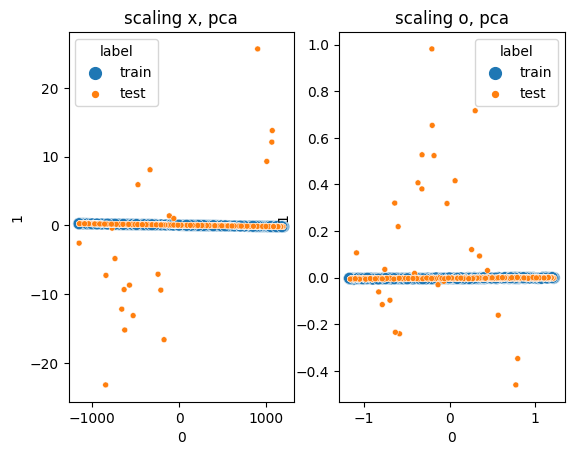

In [36]:
# all2 : pca(scaling x / scaling o)
all2_pca = pca.fit_transform(all2)
all2_pca = pd.DataFrame(all2_pca)
all2_pca['label'] = ['train'] * len(train[train['type']==2]) + ['test'] * len(test[test['type']==2])

plt.subplot(1,2,1)
sns.scatterplot(x=all2_pca[0], y=all2_pca[1], data=all2_pca, hue='label', size='label')
plt.title('scaling x, pca')

all2_scaled_pca = pca.fit_transform(scaler.fit_transform(all2))
all2_scaled_pca = pd.DataFrame(all2_scaled_pca)
all2_scaled_pca['label'] = ['train'] * len(train[train['type']==2]) + ['test'] * len(test[test['type']==2])

plt.subplot(1,2,2)
sns.scatterplot(x=all2_scaled_pca[0], y=all2_scaled_pca[1], data=all2_scaled_pca, hue='label', size='label')
plt.title('scaling o, pca')
plt.show()

In [37]:
# 선형회귀 방정식 구하기 : 방정식에 대입했을 때 차이가 많이 나면 이상치
# scaling o
from sklearn.linear_model import LinearRegression

train2_pca = all2_pca[all2_pca['label']=='train']
test2_pca = all2_pca[all2_pca['label']=='test']

reg2 = LinearRegression()
reg2.fit(train2_pca[0].values.reshape(-1,1), train2_pca[1])

test2_pca['diff'] = abs(reg2.coef_ * test2_pca[0] + reg2.intercept_ - test2_pca[1])

<ipython-input-37-41648e8eb1fe>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2_pca['diff'] = abs(reg2.coef_ * test2_pca[0] + reg2.intercept_ - test2_pca[1])


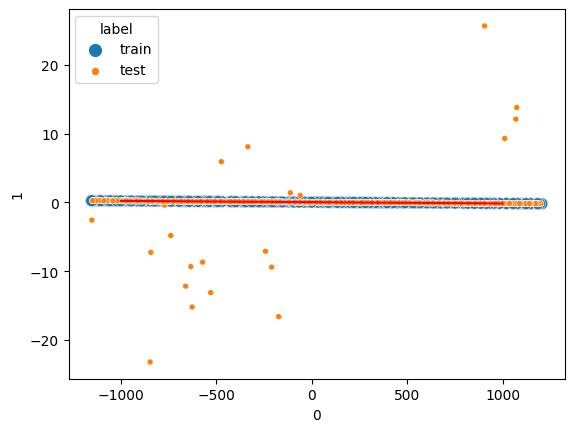

In [38]:
X = np.array(range(-1000,1000))
sns.scatterplot(x=all2_pca[0], y=all2_pca[1], data=all2_pca, hue='label', size='label')
plt.plot(X, reg2.coef_ * X + reg2.intercept_, color='red')
#plt.ylim([-0.04,0.04])
plt.show()

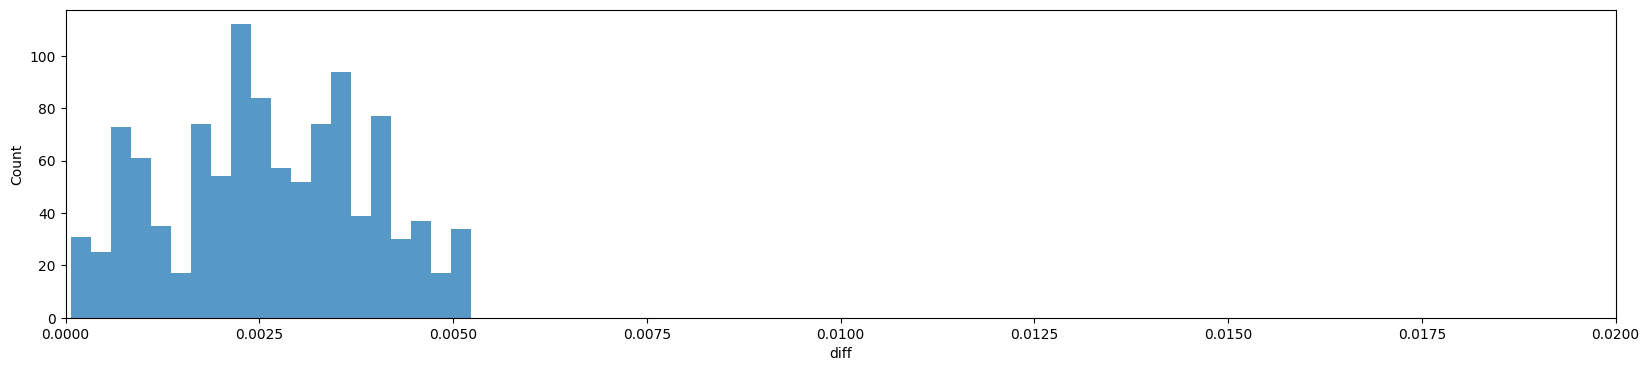

In [44]:
# diff 분포 확인
plt.figure(figsize=(20,4))
sns.histplot(x='diff', data=test2_pca, bins=100000)
plt.xlim([0,0.02])
plt.show() # 0.5 이상이면 이상치

In [45]:
# 이상치 판단
test2_pca['label'] = np.where(test2_pca['diff'] > 0.0075, 1, 0)
test2_pca['label'].value_counts()

<ipython-input-45-efabb5b1b4f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2_pca['label'] = np.where(test2_pca['diff'] > 0.0075, 1, 0)


0    1077
1      21
Name: label, dtype: int64

In [49]:
test2_tsne = tsne.fit_transform(test[test['type']==2].drop('type', axis=1))
test2_tsne = pd.DataFrame(test2_tsne)
test2_tsne.index = test2_pca.index
test2_tsne = pd.concat([test2_tsne, test2_pca['label']], axis=1)
test2_tsne['size'] = np.where(test2_tsne['label']==1, 10, 4)

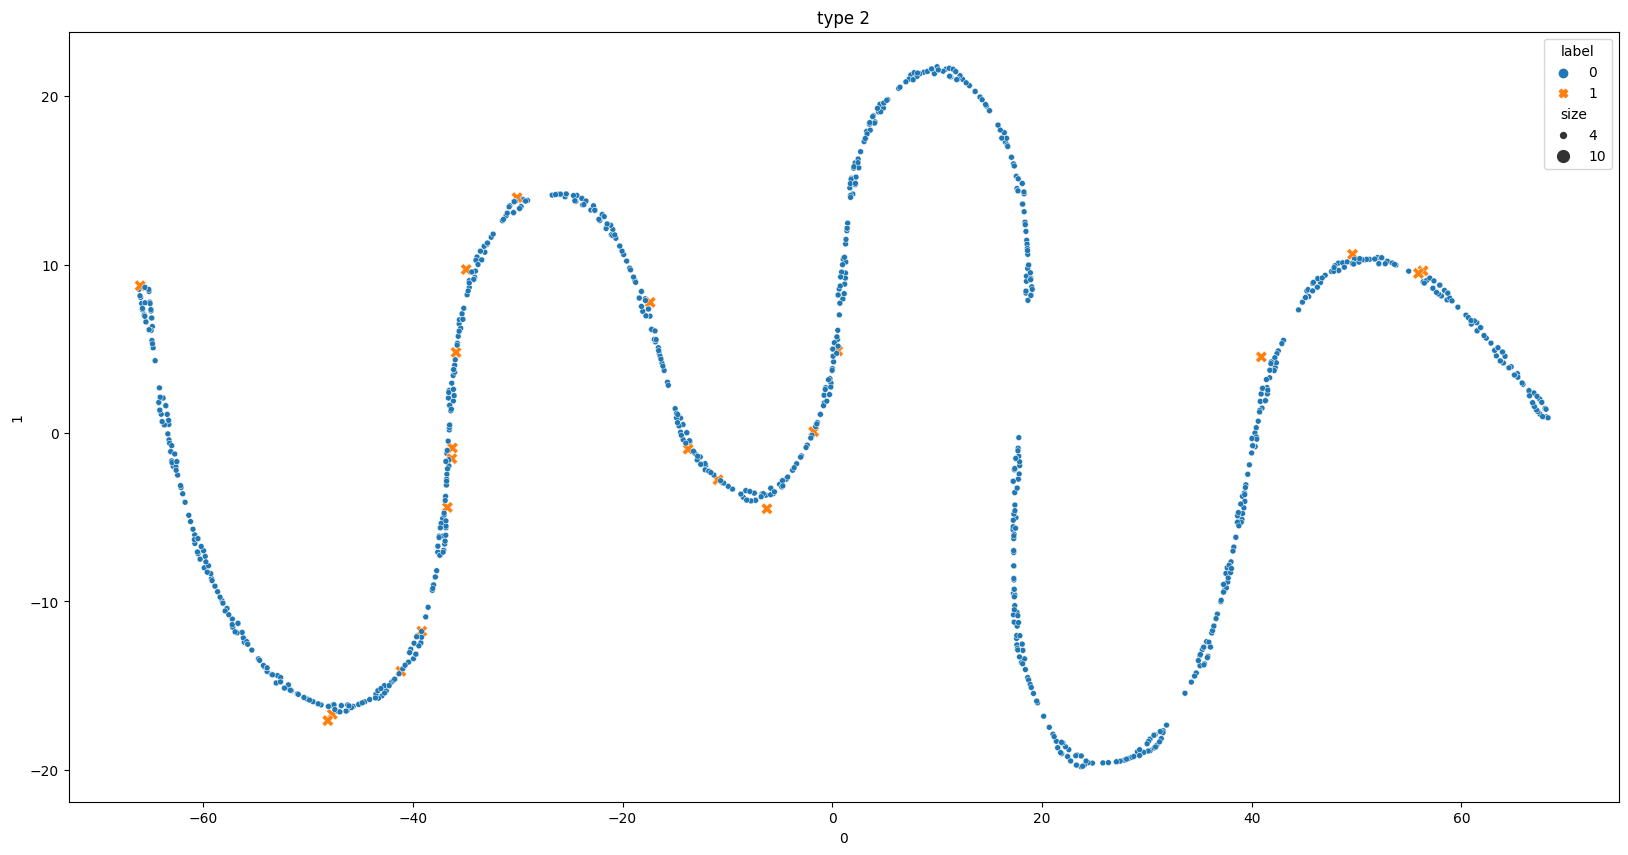

In [50]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=test2_tsne[0], y=test2_tsne[1], data=test2_tsne, hue='label', style='label', size='size')
plt.title('type 2')
#plt.xlim([-55,-45])
plt.show()

##### type 3

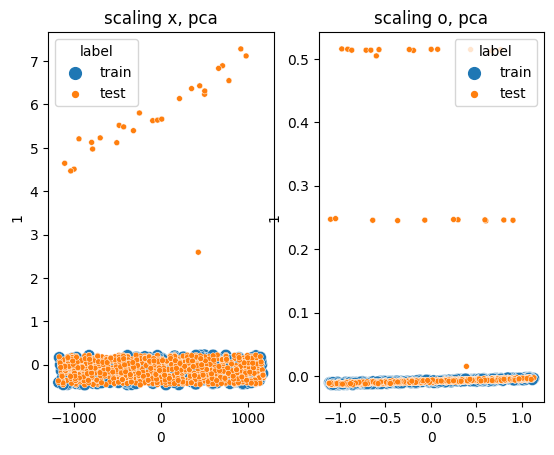

In [46]:
# all3 : pca(scaling x / scaling o)
all3_pca = pca.fit_transform(all3)
all3_pca = pd.DataFrame(all3_pca)
all3_pca['label'] = ['train'] * len(train[train['type']==3]) + ['test'] * len(test[test['type']==3])

plt.subplot(1,2,1)
sns.scatterplot(x=all3_pca[0], y=all3_pca[1], data=all3_pca, hue='label', size='label')
plt.title('scaling x, pca')

all3_scaled_pca = pca.fit_transform(scaler.fit_transform(all3))
all3_scaled_pca = pd.DataFrame(all3_scaled_pca)
all3_scaled_pca['label'] = ['train'] * len(train[train['type']==3]) + ['test'] * len(test[test['type']==3])

plt.subplot(1,2,2)
sns.scatterplot(x=all3_scaled_pca[0], y=all3_scaled_pca[1], data=all3_scaled_pca, hue='label', size='label')
plt.title('scaling o, pca')
plt.show()

In [52]:
# 선형회귀 방정식 구하기 : 방정식에 대입했을 때 차이가 많이 나면 이상치
# scaling o
from sklearn.linear_model import LinearRegression

train3_pca = all3_pca[all3_pca['label']=='train']
test3_pca = all3_pca[all3_pca['label']=='test']

reg3 = LinearRegression()
reg3.fit(train3_pca[0].values.reshape(-1,1), train3_pca[1])

test3_pca['diff'] = abs(reg3.coef_ * test3_pca[0] + reg3.intercept_ - test3_pca[1])

<ipython-input-52-c3d957cd1cb9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test3_pca['diff'] = abs(reg3.coef_ * test3_pca[0] + reg3.intercept_ - test3_pca[1])


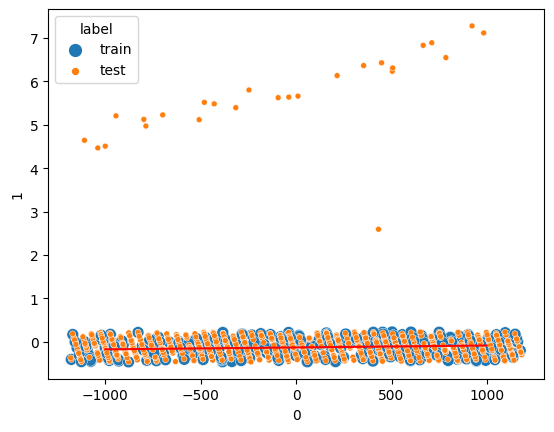

In [53]:
X = np.array(range(-1000,1000))
sns.scatterplot(x=all3_pca[0], y=all3_pca[1], data=all3_pca, hue='label', size='label')
plt.plot(X, reg3.coef_ * X + reg3.intercept_, color='red')
#plt.ylim([-0.02,0])
plt.show()

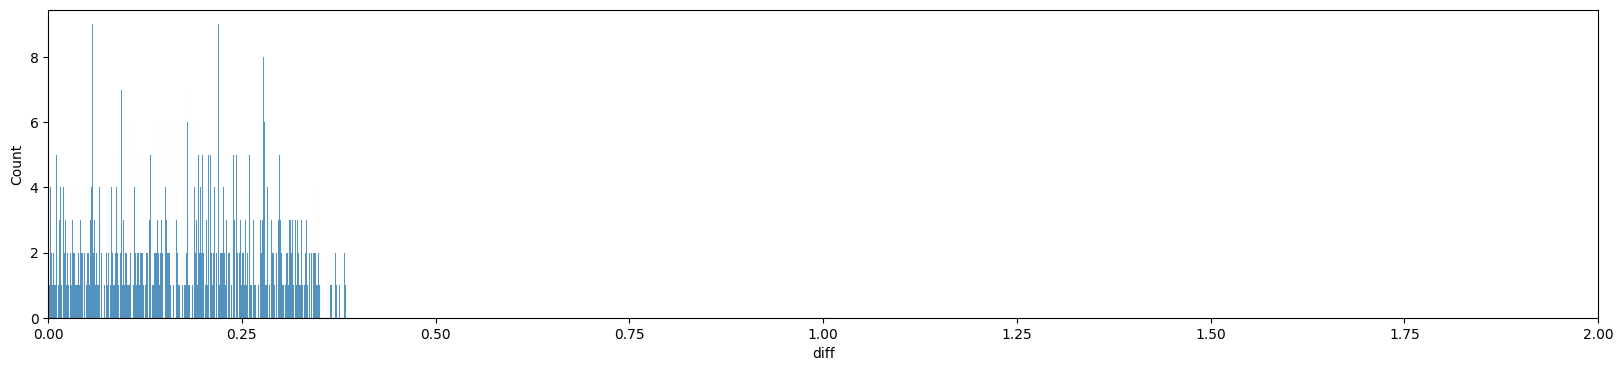

In [55]:
# diff 분포 확인
plt.figure(figsize=(20,4))
sns.histplot(x='diff', data=test3_pca, bins=10000)
plt.xlim([0,2])
plt.show() # 0.5 이상이면 이상치

In [56]:
# 이상치 판단
test3_pca['label'] = np.where(test3_pca['diff'] > 0.5, 1, 0)
test3_pca['label'].value_counts()

<ipython-input-56-3160af012878>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test3_pca['label'] = np.where(test3_pca['diff'] > 0.5, 1, 0)


0    892
1     26
Name: label, dtype: int64

In [57]:
test3_tsne = tsne.fit_transform(test[test['type']==3].drop('type', axis=1))
test3_tsne = pd.DataFrame(test3_tsne)
test3_tsne.index = test3_pca.index
test3_tsne = pd.concat([test3_tsne, test3_pca['label']], axis=1)
test3_tsne['size'] = np.where(test3_tsne['label']==1, 10, 4)

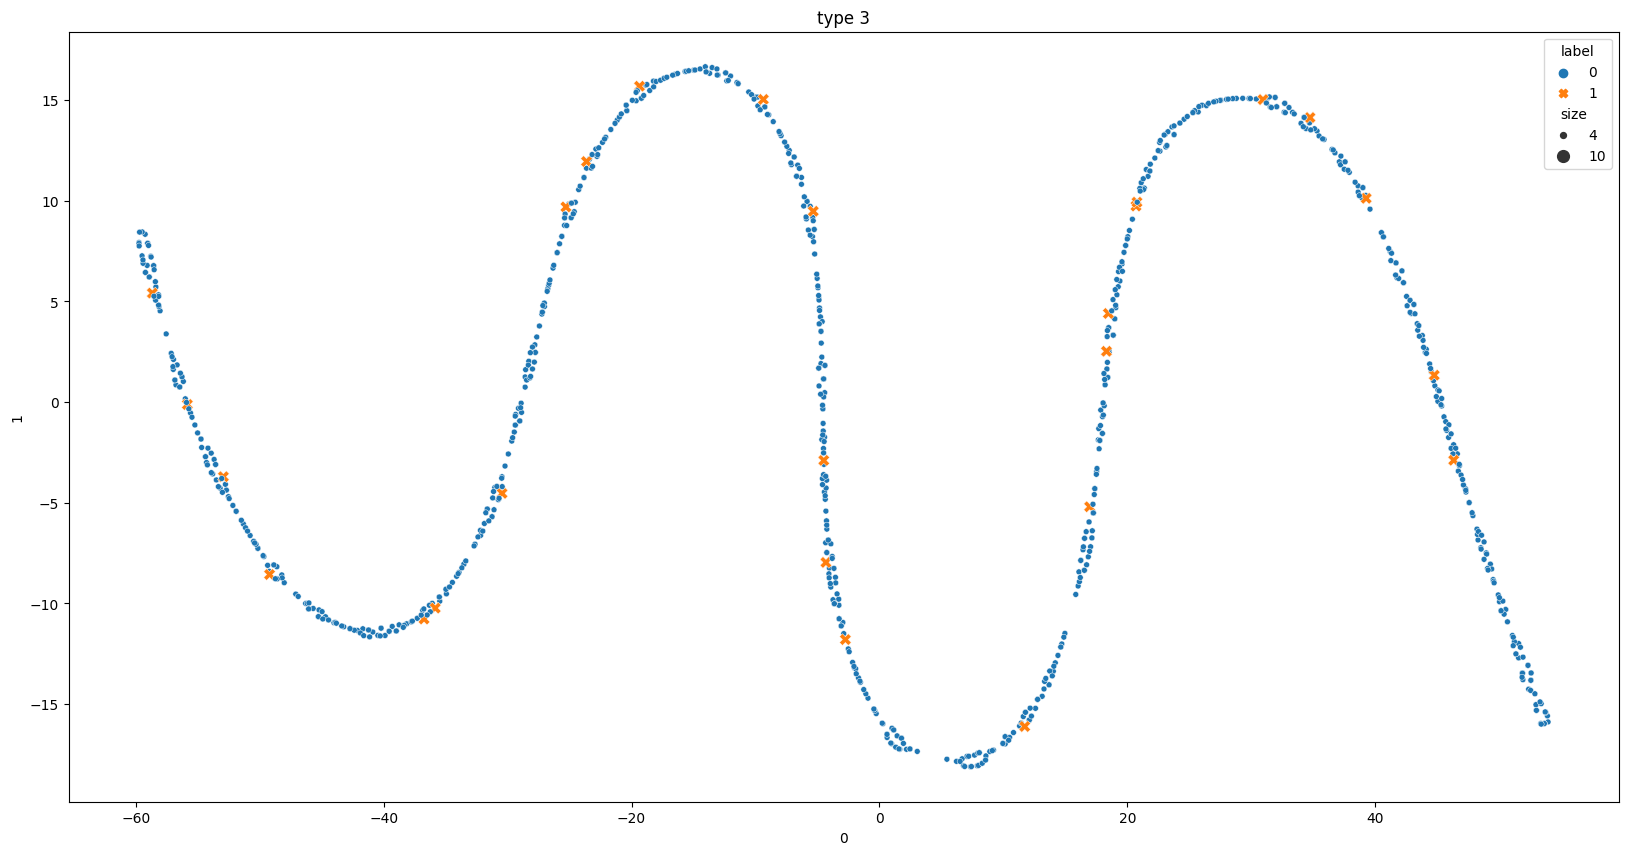

In [58]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=test3_tsne[0], y=test3_tsne[1], data=test3_tsne, hue='label', style='label', size='size')
plt.title('type 3')
plt.show()

##### type 4

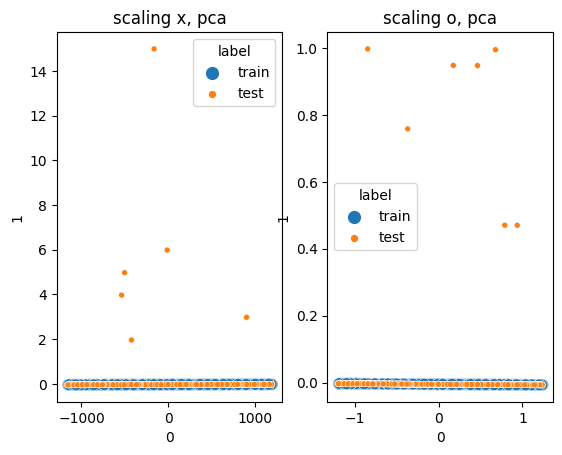

In [61]:
# all4 : pca(scaling x / scaling o)
all4_pca = pca.fit_transform(all4)
all4_pca = pd.DataFrame(all4_pca)
all4_pca['label'] = ['train'] * len(train[train['type']==4]) + ['test'] * len(test[test['type']==4])

plt.subplot(1,2,1)
sns.scatterplot(x=all4_pca[0], y=all4_pca[1], data=all4_pca, hue='label', size='label')
plt.title('scaling x, pca')

all4_scaled_pca = pca.fit_transform(scaler.fit_transform(all4))
all4_scaled_pca = pd.DataFrame(all4_scaled_pca)
all4_scaled_pca['label'] = ['train'] * len(train[train['type']==4]) + ['test'] * len(test[test['type']==4])

plt.subplot(1,2,2)
sns.scatterplot(x=all4_scaled_pca[0], y=all4_scaled_pca[1], data=all4_scaled_pca, hue='label', size='label')
plt.title('scaling o, pca')
plt.show()

In [62]:
# 선형회귀 방정식 구하기 : 방정식에 대입했을 때 차이가 많이 나면 이상치
# scaling o
from sklearn.linear_model import LinearRegression

train4_pca = all4_pca[all4_pca['label']=='train']
test4_pca = all4_pca[all4_pca['label']=='test']

reg4 = LinearRegression()
reg4.fit(train4_pca[0].values.reshape(-1,1), train4_pca[1])

test4_pca['diff'] = abs(reg4.coef_ * test4_pca[0] + reg4.intercept_ - test4_pca[1])

<ipython-input-62-14331e6ae684>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test4_pca['diff'] = abs(reg4.coef_ * test4_pca[0] + reg4.intercept_ - test4_pca[1])


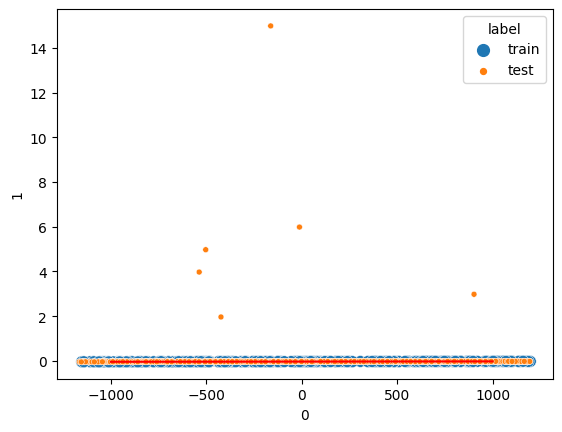

In [63]:
X = np.array(range(-1000,1000))
sns.scatterplot(x=all4_pca[0], y=all4_pca[1], data=all4_pca, hue='label', size='label')
plt.plot(X, reg4.coef_ * X + reg4.intercept_, color='red')
#plt.ylim([-0.004,-0.003])
#plt.ylim([-0.0055,-0.0045])
#plt.ylim([-0.0065,-0.006])
#plt.ylim([-0.007,-0.0025])
plt.show()

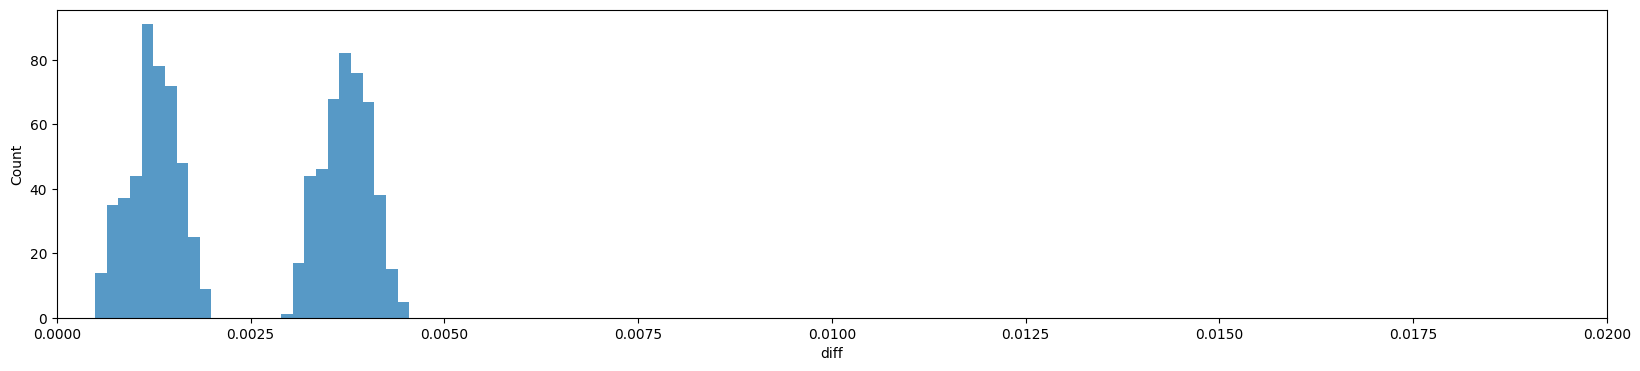

In [69]:
# diff 분포 확인
plt.figure(figsize=(20,4))
sns.histplot(x='diff', data=test4_pca, bins=100000)
plt.xlim([0,0.02])
plt.show() # 0.02 이상이면 이상치

In [70]:
# 이상치 판단
test4_pca['label'] = np.where(test4_pca['diff'] > 0.005, 1, 0)
test4_pca['label'].value_counts()

<ipython-input-70-97b47b725050>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test4_pca['label'] = np.where(test4_pca['diff'] > 0.005, 1, 0)


0    912
1      6
Name: label, dtype: int64

In [66]:
test4_tsne = tsne.fit_transform(test[test['type']==4].drop('type', axis=1))
test4_tsne = pd.DataFrame(test4_tsne)
test4_tsne.index = test4_pca.index
test4_tsne = pd.concat([test4_tsne, test4_pca['label']], axis=1)
test4_tsne['size'] = np.where(test4_tsne['label']==1, 10, 4)

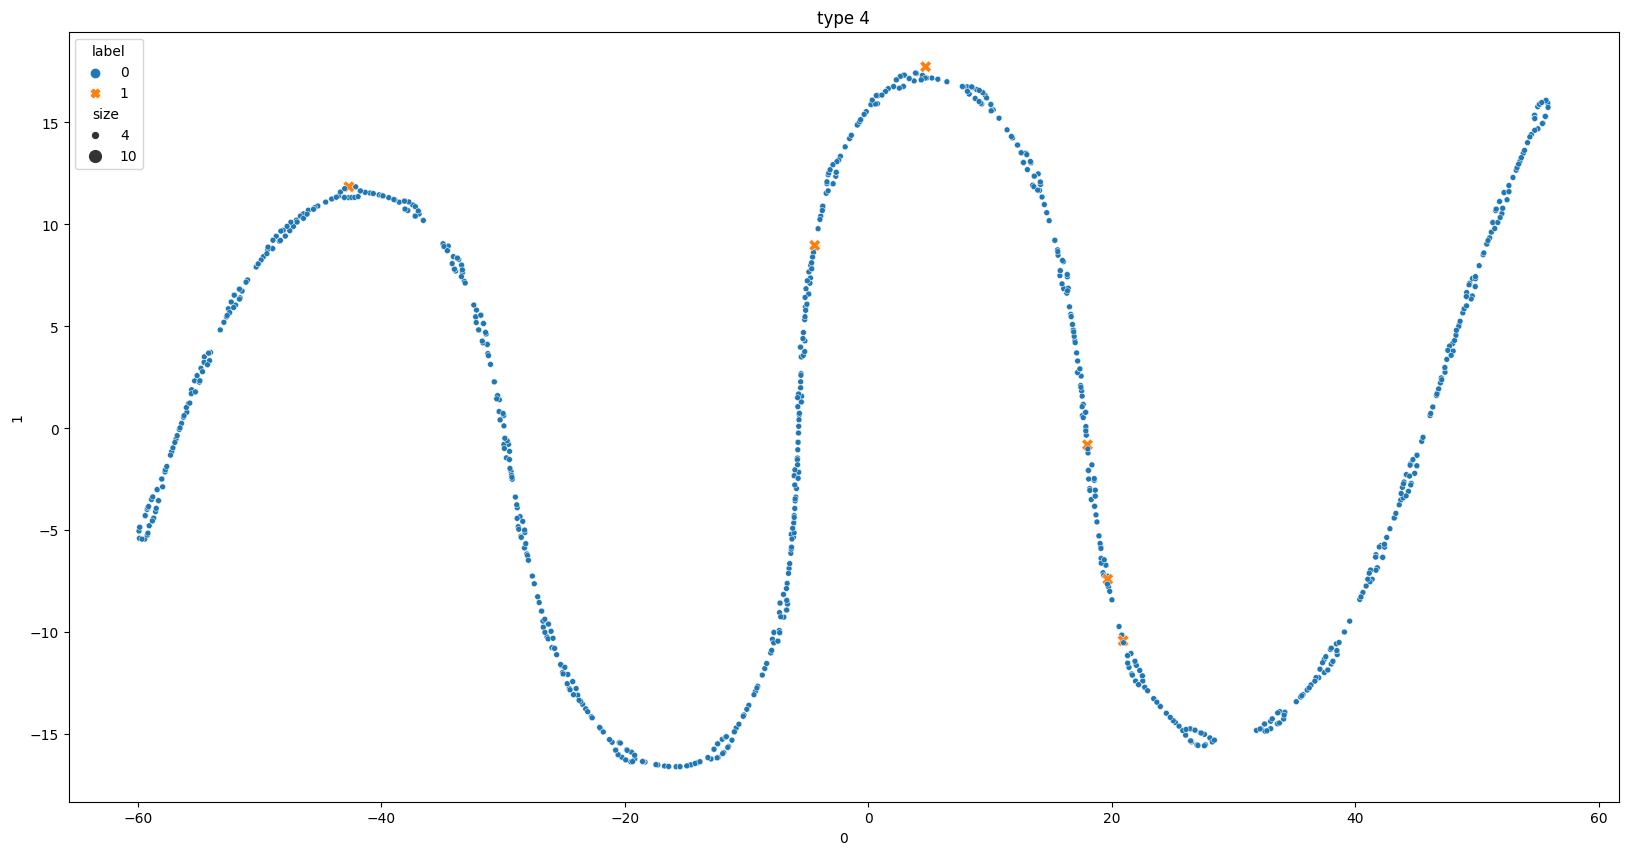

In [67]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=test4_tsne[0], y=test4_tsne[1], data=test4_tsne, hue='label', style='label', size='size')
plt.title('type 4')
plt.show()

##### type 5

In [ ]:
# all5 : pca(scaling x / scaling o)
all5_pca = pca.fit_transform(all5)
all5_pca = pd.DataFrame(all5_pca)
all5_pca['label'] = ['train'] * len(train[train['type']==5]) + ['test'] * len(test[test['type']==5])

plt.subplot(1,2,1)
sns.scatterplot(x=all5_pca[0], y=all5_pca[1], data=all5_pca, hue='label', size='label')
plt.title('scaling x, pca')

all5_scaled_pca = pca.fit_transform(scaler.fit_transform(all5))
all5_scaled_pca = pd.DataFrame(all5_scaled_pca)
all5_scaled_pca['label'] = ['train'] * len(train[train['type']==5]) + ['test'] * len(test[test['type']==5])

plt.subplot(1,2,2)
sns.scatterplot(x=all5_scaled_pca[0], y=all5_scaled_pca[1], data=all5_scaled_pca, hue='label', size='label')
plt.title('scaling o, pca')
plt.show()

In [ ]:
# 선형회귀 방정식 구하기 : 방정식에 대입했을 때 차이가 많이 나면 이상치
# scaling x
from sklearn.linear_model import LinearRegression

train5_pca = pd.DataFrame(pca.fit_transform(train[train['type']==5].drop(['out_pressure','type'], axis=1)))
test5_pca = pd.DataFrame(pca.fit_transform(test[test['type']==5].drop(['out_pressure','type'], axis=1)))

reg5 = LinearRegression()
reg5.fit(train5_pca[0].values.reshape(-1,1), train5_pca[1])

test5_pca['diff'] = abs(reg5.coef_ * test5_pca[0] + reg5.intercept_ - test5_pca[1])

In [ ]:
# diff 분포 확인
plt.figure(figsize=(20,4))
sns.histplot(x='diff', data=test5_pca)
plt.xlim([0,0.25])
plt.show() # 0.25 이상이면 이상치

In [ ]:
# 이상치 판단
test5_pca['label'] = np.where(test5_pca['diff'] > 0.25, 1, 0)
test5_pca['label'].value_counts()

##### type 6

In [ ]:
# all6 : pca(scaling x / scaling o)
all6_pca = pca.fit_transform(all6)
all6_pca = pd.DataFrame(all6_pca)
all6_pca['label'] = ['train'] * len(train[train['type']==6]) + ['test'] * len(test[test['type']==6])

plt.subplot(1,2,1)
sns.scatterplot(x=all6_pca[0], y=all6_pca[1], data=all6_pca, hue='label', size='label')
plt.title('scaling x, pca')

all6_scaled_pca = pca.fit_transform(scaler.fit_transform(all6))
all6_scaled_pca = pd.DataFrame(all6_scaled_pca)
all6_scaled_pca['label'] = ['train'] * len(train[train['type']==6]) + ['test'] * len(test[test['type']==6])

plt.subplot(1,2,2)
sns.scatterplot(x=all6_scaled_pca[0], y=all6_scaled_pca[1], data=all6_scaled_pca, hue='label', size='label')
plt.title('scaling o, pca')
plt.show()

In [ ]:
# 선형회귀 방정식 구하기 : 방정식에 대입했을 때 차이가 많이 나면 이상치
# scaling x
from sklearn.linear_model import LinearRegression

train6_pca = pd.DataFrame(pca.fit_transform(train[train['type']==6].drop(['out_pressure','type'], axis=1)))
test6_pca = pd.DataFrame(pca.fit_transform(test[test['type']==6].drop(['out_pressure','type'], axis=1)))

reg6 = LinearRegression()
reg6.fit(train6_pca[0].values.reshape(-1,1), train6_pca[1])

test6_pca['diff'] = abs(reg6.coef_ * test6_pca[0] + reg6.intercept_ - test6_pca[1])

In [ ]:
# diff 분포 확인
plt.figure(figsize=(20,4))
sns.histplot(x='diff', data=test6_pca)
plt.xlim([0,0.4])
plt.show() # 0.4 이상이면 이상치

In [ ]:
# 이상치 판단
test6_pca['label'] = np.where(test6_pca['diff'] > 0.4, 1, 0)
test6_pca['label'].value_counts()

##### type 7

In [ ]:
# all7 : pca(scaling x / scaling o)
all7_pca = pca.fit_transform(all7)
all7_pca = pd.DataFrame(all7_pca)
all7_pca['label'] = ['train'] * len(train[train['type']==7]) + ['test'] * len(test[test['type']==7])

plt.subplot(1,2,1)
sns.scatterplot(x=all7_pca[0], y=all7_pca[1], data=all7_pca, hue='label', size='label')
plt.title('scaling x, pca')

all7_scaled_pca = pca.fit_transform(scaler.fit_transform(all7))
all7_scaled_pca = pd.DataFrame(all7_scaled_pca)
all7_scaled_pca['label'] = ['train'] * len(train[train['type']==7]) + ['test'] * len(test[test['type']==7])

plt.subplot(1,2,2)
sns.scatterplot(x=all7_scaled_pca[0], y=all7_scaled_pca[1], data=all7_scaled_pca, hue='label', size='label')
plt.title('scaling o, pca')
plt.show()

In [ ]:
# 선형회귀 방정식 구하기 : 방정식에 대입했을 때 차이가 많이 나면 이상치
# scaling x
from sklearn.linear_model import LinearRegression

train7_pca = pd.DataFrame(pca.fit_transform(train[train['type']==7].drop(['out_pressure','type'], axis=1)))
test7_pca = pd.DataFrame(pca.fit_transform(test[test['type']==7].drop(['out_pressure','type'], axis=1)))

reg7 = LinearRegression()
reg7.fit(train7_pca[0].values.reshape(-1,1), train7_pca[1])

test7_pca['diff'] = abs(reg7.coef_ * test7_pca[0] + reg7.intercept_ - test7_pca[1])

In [ ]:
# diff 분포 확인
plt.figure(figsize=(20,4))
sns.histplot(x='diff', data=test7_pca)
plt.xlim([0,0.1])
plt.show() # 0.1 이상이면 이상치

In [ ]:
# 이상치 판단
test7_pca['label'] = np.where(test7_pca['diff'] > 0.1, 1, 0)
test7_pca['label'].value_counts()

##### answer file

In [ ]:
answer = pd.concat([test0_pca['label'], test1_pca['label'], test2_pca['label'], test3_pca['label'], test4_pca['label'],
                    test5_pca['label'], test6_pca['label'], test7_pca['label']]).reset_index(drop=True)
answer.to_csv('answer.csv')